#Income Prediction Problem
In this Notebook, I am working through the Income Prediction problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not someone is making more or less than $50,000 a year. While working through this problem, I am following a framework I use to attack all my machine learning problems. It includes the following steps:

1. Load Libraries
2. Load Data
3. Analyze Data
4. Feature Engineering
5. Modeling
6. Algorithm Tuning
7. Finalizing the Model

I hope you enjoy this notebook and find it useful. Please keep in mind this is my first Notebook on here so don't judge it too harshly!

##1. Load Libaraies

First, we need to load all of our libraries we will use for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
import tensorflow as tf
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import itertools
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log_adult.csv', append=True, separator=';')

from keras.models import Model, load_model,Sequential
from keras.layers import Input, Dense,Dropout,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

import os
#print(os.listdir(""))

from pandas.compat import StringIO
from sklearn import metrics

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

##2. Load Data

Next, we load our data.

In [3]:
dataset = pd.read_csv("../input/adult.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

In [5]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
# Peek at data
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [7]:

# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


##3. Analyze Data

In [8]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

###3.1. Numeric Data Analysis

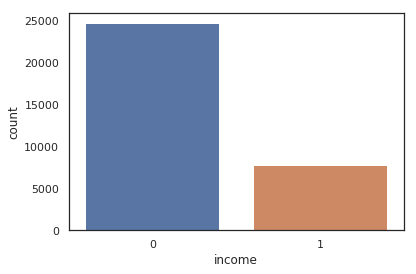

In [9]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
plt.show()

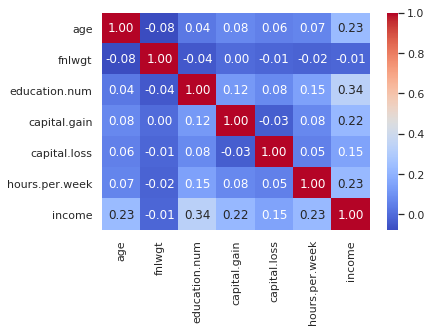

In [10]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


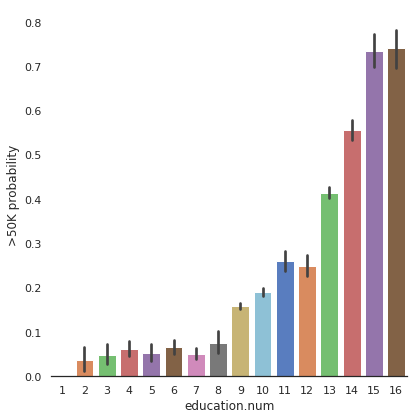

In [11]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


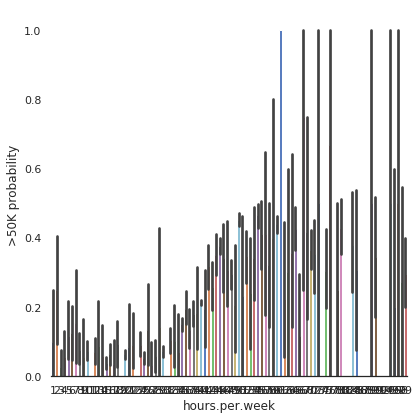

In [12]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


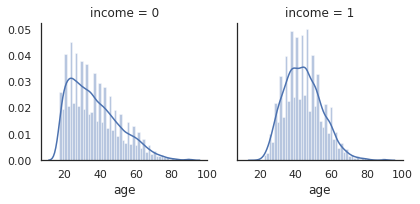

In [13]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

###3.2. Categorical Data Analysis

In [14]:
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


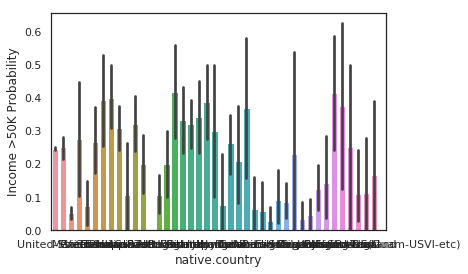

In [15]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


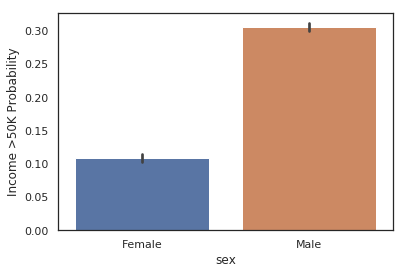

In [16]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


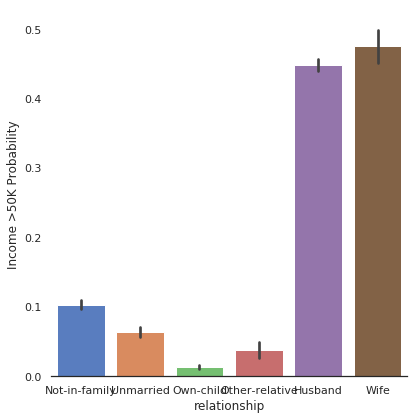

In [17]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


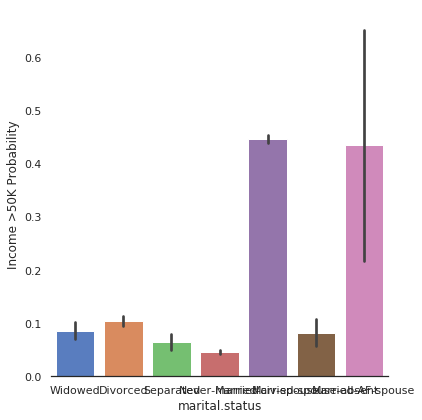

In [18]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


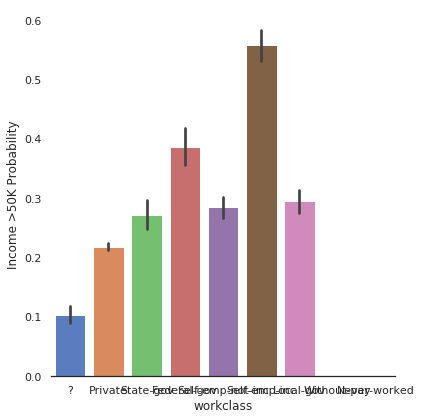

In [19]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

##4. Feature Engineering

In [20]:
####################################################
############### FEATURE ENGINEERING ################
####################################################
# Convert Sex value to 0 and 1
dataset.fillna('0', axis =1, inplace = True)
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num   ...    capital.loss  hours.per.week  income
0   90   77053              9   ...            4356              40       0
1   82  132870              9   ...            4356              18       0
2   66  186061             10   ...            4356              40       0
3   54  140359              4   ...            3900              40       0
4   41  264663             10   ...            3900              40       0

[5 rows x 9 columns]


##5. Modeling

In [21]:
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables


import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")


from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()

df_mm = scaler.fit_transform(dataset)

df1_scaled = pd.DataFrame(df_mm, columns=dataset.columns)
df1_scaled.fillna('0', axis =1, inplace = True)

X=df1_scaled.iloc[:,0:8]
y=df1_scaled.iloc[:,8]
#    print(X.head())
#    print(y.head())
    
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel())
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)
X_train_res.columns = X.columns
y_train_res.columns = pd.DataFrame(y).columns
    #print(y_train_res)
#print("After SMOTE",y_train_res.Income.value_counts())

new_df = pd.concat([X_train_res, y_train_res], axis=1, sort=False)
new_df.head()

validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_res,y_train_res,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 

LR: 0.807165 (0.003962)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LDA: 0.792122 (0.002980)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

KNN: 0.846531 (0.003549)
CART: 0.836873 (0.006127)
NB: 0.667931 (0.007747)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RF: 0.872851 (0.005349)


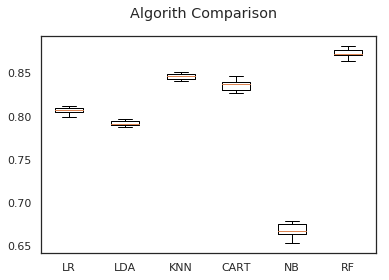

In [22]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##6. Algorithm Tuning

In [23]:
####################################################
################ ALGORITHM TUNING ##################
####################################################
'''
Commented Out to Reduce Script Time - Took 20 Minutes to run.
best n_estimator = 250
best max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\nCommented Out to Reduce Script Time - Took 20 Minutes to run.\nbest n_estimator = 250\nbest max_feature = 5\n# Tune Random Forest\nn_estimators = np.array([50,100,150,200,250])\nmax_features = np.array([1,2,3,4,5])\nparam_grid = dict(n_estimators=n_estimators,max_features=max_features)\nmodel = RandomForestClassifier()\nkfold = KFold(n_splits=num_folds, random_state=seed)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(X_train, Y_train)\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [24]:
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




##7. Finalize Model

In [25]:
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy: 87.48988673139159%
[[4277  713]
 [ 524 4374]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      4990
         1.0       0.86      0.89      0.88      4898

   micro avg       0.87      0.87      0.87      9888
   macro avg       0.88      0.88      0.87      9888
weighted avg       0.88      0.87      0.87      9888



In [26]:
knn =  KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy: 84.50647249190939%
[[3930 1060]
 [ 472 4426]]
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      4990
         1.0       0.81      0.90      0.85      4898

   micro avg       0.85      0.85      0.85      9888
   macro avg       0.85      0.85      0.84      9888
weighted avg       0.85      0.85      0.84      9888



In [27]:
#DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))



Accuracy: 83.5254854368932%
[[4090  900]
 [ 729 4169]]
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      4990
         1.0       0.82      0.85      0.84      4898

   micro avg       0.84      0.84      0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888



In [28]:
#LogisticRegression
from sklearn import metrics
random_forest =  LogisticRegression()
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
y_test = Y_validation
y_pred = random_forest.predict_proba(X_validation)
pred = y_pred
#print(pred)
pred[pred > 0.5 ] = 1
pred[pred <= 0.5] = 0
print(pred)
print(accuracy_score(y_test,pred)*100)
fpr,tpr,the= metrics.roc_curve(y_test,pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
dict_characters = {0: 'Malignant', 1: 'Benign'}
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()
print("Accuracy: %s%%" % (100*metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

Accuracy: 80.3296925566343%
[[3881 1109]
 [ 836 4062]]
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      4990
         1.0       0.79      0.83      0.81      4898

   micro avg       0.80      0.80      0.80      9888
   macro avg       0.80      0.80      0.80      9888
weighted avg       0.80      0.80      0.80      9888



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [29]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

def ROC_plot(pred_prob, pred,y_test):
    temp3 = pd.DataFrame()
    print("\n")
   # ax1 = plt.subplot(221)
    fpr,tpr,the= metrics.roc_curve(y_test,pred)
    auc = metrics.roc_auc_score(y_test, pred_prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.show()
    print("\n")
   # ax2 = plt.subplot(222)
    cnf_matrix = confusion_matrix(y_test, pred)
    dict_characters = {0: 'Malignant', 1: 'Benign'}
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print("\n")
    print('\x1b[1;32m'+ "Accuracy: %s%%" % round(100*metrics.accuracy_score(y_test, pred),2)+'\x1b[0m')
    print("\n")
    print(metrics.classification_report(y_test, pred))
    
    #print(metrics.accuracy_score(y_test, pred))
    temp3['Accuracy'] = pd.Series(metrics.accuracy_score(y_test, pred))
    temp3['AUC'] = pd.Series(metrics.roc_auc_score(y_test, pred))
    temp3['F1 Score'] = pd.Series(metrics.f1_score(y_test, pred, average='weighted') )
    temp3['Recall'] = pd.Series(metrics.recall_score(y_test, pred, average='weighted'))
    temp3['Precision'] = pd.Series(metrics.precision_score(y_test, pred, average='weighted') )
    #print(temp3)
    roc_model = pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr)], axis =1)
    return temp3,roc_model


def seperate_data(df1):
    
    return X,y

def traintest_split(df1):
    X=df1.iloc[:,0:-1]
    y=df1.iloc[:,-1]
#    print(X.head())
#    print(y.head())
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)
    print(x_train.shape)
    print(x_test.shape)
 #   print(y_train.shape)
  #  sm = SMOTE(random_state=2)
  #  X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
  #  X_train_res = pd.DataFrame(X_train_res)
  #  y_train_res = pd.DataFrame(y_train_res)
   # y_train_res.columns = ['Income']
    #print(y_train_res)
  #  print("After SMOTE",y_train_res.Income.value_counts())
    return x_train,x_test,y_train,y_test




pd.set_option('display.float_format', lambda x: '%.3f' % x)

def autoencoder(x_train, x_test, epoch = 10):
    
    encoder_acc_df = pd.DataFrame()
    input_dim = x_train.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
#encoder2 = Dense(int(encoding_dim / 2), activation="relu")(encoder1)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder3)
#decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder2)
    decoder = Dense(encoding_dim, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)


    nb_epoch = epoch
    batch_size = 64
    print('\x1b[1;32m'+"\nAuto encoder Training\n" +'\x1b[0m')
    autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')
   # checkpointer = ModelCheckpoint(filepath="model.h5",
   #                            verbose=0,
  #                             save_best_only=True)
  #  tensorboard = TensorBoard(log_dir='./logs',
  #                        histogram_freq=0,
   #                       write_graph=True,
   #                       write_images=True)
    history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[csv_logger]).history
    encoder = Model(input_layer, encoder)
    encoded_input = Input(shape = (encoding_dim, ))


#Encode data set from above using the encoder
    encoded_train_x = encoder.predict(x_train)
    encoded_test_x = encoder.predict(x_test)
    
    temp = pd.DataFrame()

    L  = []
    for x in range(nb_epoch):
       L.append((str(input_dim) + ',' + str(encoding_dim) +  ',' + str(int(encoding_dim / 2)) + ',' + str(encoding_dim) + ',' + str(input_dim)))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)

#history['Layer'].append(L)    
#encoder_acc_df.assign(Layer=L)
#encoder_acc_df.append(pd.DataFrame(history[['acc','val_acc','loss','val_loss']])    )

    temp['Layer'] = pd.Series(L)
    temp['epoch'] = pd.Series(epoch_list).astype('str')
 #   temp['Acc'] = history['acc']
   # temp['Val_Acc'] = history['val_acc']
    temp['Loss']= history['loss']  
    temp['Val_Loss'] = history['val_loss']
    
    return encoded_train_x,encoded_test_x,temp
   
    
    

#encoder = Model(input_layer, encoder2)
#encoded_input = Input(shape = (encoding_dim, ))


#Encode data set from above using the encoder
#encoded_train_x = encoder.predict(x_train)
#encoded_test_x = encoder.predict(x_test)


def stacked_model(encoded_train_x  , y_train, epochs =10):
    temp2 = pd.DataFrame()
    nb_epoch = epochs
    model = Sequential()
    model.add(Dense(10, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"
                )
          )
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer='adam', 
                    metrics=['accuracy'])
    print('\x1b[1;32m'+"\nModel Summary\n" +'\x1b[0m')
    print(model.summary())
    print('\x1b[1;32m'+"\nStacked Autoencoder Training\n" +'\x1b[0m')
    stacked_history = model.fit(encoded_train_x  , y_train, validation_split =0.2 , epochs = epochs , batch_size =128,callbacks=[CSVLogger('fit.log')])
    
    L  = []
    for x in range(nb_epoch):
       L.append((str(encoded_train_x.shape[1]) + ',' + '16' +  ',' + '1'))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)
 
    temp2['Layer'] = pd.Series(L)
    temp2['epoch'] = pd.Series(epoch_list).astype('str')
    temp2['Acc'] = stacked_history.history['acc']
    temp2['Val_Acc'] = stacked_history.history['val_acc']
    temp2['Loss'] = stacked_history.history['loss']  
    temp2['Val_Loss'] = stacked_history.history['val_loss']
    return stacked_history, model,temp2

def predict(encoded_test_x, stacked_model):
    pred = stacked_model.predict(encoded_test_x)
    pred_prob = pred
    pred[pred > 0.5 ] = 1
    pred[pred <= 0.5] = 0
    return pred_prob, pred


SAMPLE SIZE- 20.0 %

(6624, 8)
(3264, 8)
train.shape (6624, 8)
Instructions for updating:
Colocations handled automatically by placer.

Auto encoder Training

Instructions for updating:
Use tf.cast instead.
Train on 6624 samples, validate on 3264 samples
Epoch 1/40
6624/6624 [==============================] - 0s 73us/step - loss: 0.1492 - val_loss: 0.1255
Epoch 2/40
6624/6624 [==============================] - 0s 28us/step - loss: 0.0921 - val_loss: 0.0607
Epoch 3/40
6624/6624 [==============================] - 0s 28us/step - loss: 0.0527 - val_loss: 0.0451
Epoch 4/40
6624/6624 [==============================] - 0s 29us/step - loss: 0.0431 - val_loss: 0.0384
Epoch 5/40
6624/6624 [==============================] - 0s 27us/step - loss: 0.0373 - val_loss: 0.0334
Epoch 6/40
6624/6624 [==============================] - 0s 29us/step - loss: 0.0328 - val_loss: 0.0294
Epoch 7/40
6624/6624 [==============================] - 0s 28us/step - loss: 0.0285 - val_loss: 0.0253
Epoch 8/40
6624/6624 [==

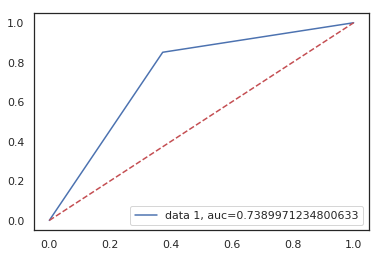

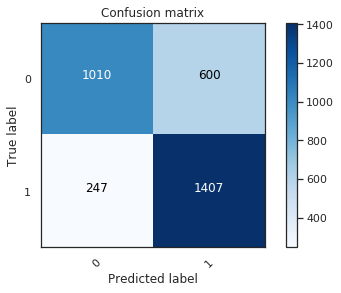



Accuracy: 74.05%


              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70      1610
         1.0       0.70      0.85      0.77      1654

   micro avg       0.74      0.74      0.74      3264
   macro avg       0.75      0.74      0.74      3264
weighted avg       0.75      0.74      0.74      3264


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 40.0 %

(13249, 8)
(6527, 8)
train.shape (13249, 8)

Auto encoder Training

Train on 13249 samples, validate on 6527 samples
Epoch 1/40
13249/13249 [==============================] - 1s 49us/step - loss: 0.1268 - val_loss: 0.0808
Epoch 2/40
13249/13249 [==============================] - 0s 24us/step - loss: 0.0604 - val_loss: 0.0454
Epoch 3/40
13249/13249 [==============================] -

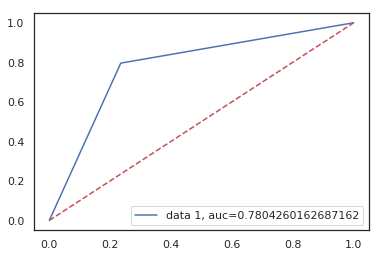

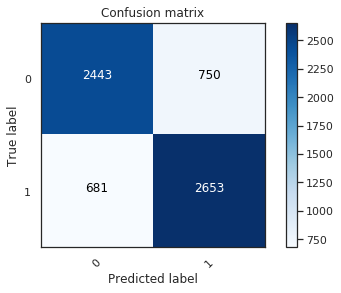



Accuracy: 78.08%


              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      3193
         1.0       0.78      0.80      0.79      3334

   micro avg       0.78      0.78      0.78      6527
   macro avg       0.78      0.78      0.78      6527
weighted avg       0.78      0.78      0.78      6527


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 60.0 %

(19874, 8)
(9790, 8)
train.shape (19874, 8)

Auto encoder Training

Train on 19874 samples, validate on 9790 samples
Epoch 1/40
19874/19874 [==============================] - 1s 47us/step - loss: 0.1055 - val_loss: 0.0471
Epoch 2/40
19874/19874 [==============================] - 0s 25us/step - loss: 0.0362 - val_loss: 0.0280
Epoch 3/40
19874/19874 [==============================] -

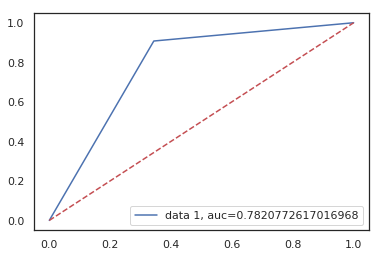

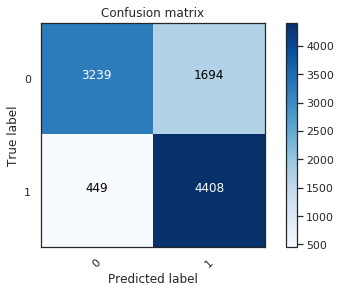



Accuracy: 78.11%


              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75      4933
         1.0       0.72      0.91      0.80      4857

   micro avg       0.78      0.78      0.78      9790
   macro avg       0.80      0.78      0.78      9790
weighted avg       0.80      0.78      0.78      9790


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 80.0 %

(26499, 8)
(13053, 8)
train.shape (26499, 8)

Auto encoder Training

Train on 26499 samples, validate on 13053 samples
Epoch 1/40
26499/26499 [==============================] - 1s 45us/step - loss: 0.0794 - val_loss: 0.0322
Epoch 2/40
26499/26499 [==============================] - 1s 28us/step - loss: 0.0234 - val_loss: 0.0184
Epoch 3/40
26499/26499 [==============================]

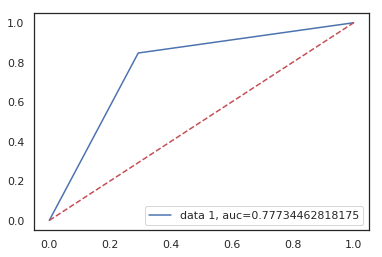

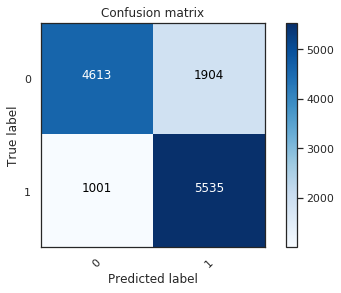



Accuracy: 77.74%


              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76      6517
         1.0       0.74      0.85      0.79      6536

   micro avg       0.78      0.78      0.78     13053
   macro avg       0.78      0.78      0.78     13053
weighted avg       0.78      0.78      0.78     13053


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 100.0 %

(33124, 8)
(16316, 8)
train.shape (33124, 8)

Auto encoder Training

Train on 33124 samples, validate on 16316 samples
Epoch 1/40
33124/33124 [==============================] - 2s 45us/step - loss: 0.0754 - val_loss: 0.0294
Epoch 2/40
33124/33124 [==============================] - 1s 27us/step - loss: 0.0200 - val_loss: 0.0166
Epoch 3/40
33124/33124 [==============================

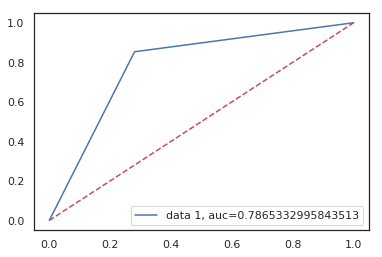

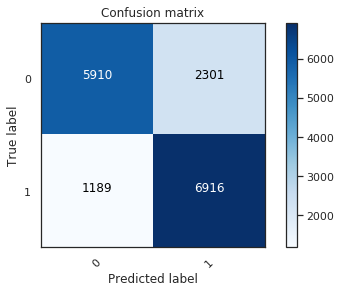



Accuracy: 78.61%


              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77      8211
         1.0       0.75      0.85      0.80      8105

   micro avg       0.79      0.79      0.79     16316
   macro avg       0.79      0.79      0.79     16316
weighted avg       0.79      0.79      0.79     16316


*************************************************************************************************************************

*************************************************************************************************************************



In [30]:
import random
random.seed(69)

encoder_acc_df = pd.DataFrame()
stacked_log_df = pd.DataFrame()
Accuracy_df = pd.DataFrame()
ROC_values = pd.DataFrame()
samples = [0.2,0.4,0.6,0.8,1.0]
#samples = [0.2,0.4]

for i in samples:
      print('\x1b[1;36m'+"SAMPLE SIZE-", i*100, "%\n" +'\x1b[0m')
      df2 = new_df.sample(frac= i)
 #     X,y = seperate_data(df2)
 #     encoded_X = autoencoder(X, epoch = 2)
 #     print( "df2 shape", df2.Income.value_counts(), df2.shape)
  #    print( "\n*********************************************")
      x_train,x_test,y_train,y_test = traintest_split(df2)
      print("train.shape", x_train.shape)
      encoded_train_x,encoded_test_x, temp = autoencoder(x_train,x_test, 40)
      temp['Sample Size'] = (str(i * 100) + "%")
      encoder_acc_df = encoder_acc_df.append(temp, ignore_index=False)
      
      history, stackedmodel, temp2 = stacked_model(encoded_train_x, y_train, 40)
      temp2['Sample Size'] = (str(i * 100) + "%")
      stacked_log_df = stacked_log_df.append(temp2, ignore_index=False)
      pred_prob, pred = predict(encoded_test_x, stackedmodel)
      
      
      
      temp3,roc_model = ROC_plot(pred_prob, pred,y_test)
      temp3['Sample Size'] = (str(i * 100) + "%")
      Accuracy_df = Accuracy_df.append(temp3, ignore_index=False)
      roc_model['Sample Size'] = (str(i * 100) + "%")
      ROC_values = ROC_values.append(roc_model)
      del history
      del stackedmodel
      del df2
      del x_train,x_test,y_train,y_test
      del pred_prob, pred
      
      print( "\n*************************************************************************************************************************\n")
      print( "*************************************************************************************************************************\n")

In [31]:
Accuracy_df[['Sample Size', 'Accuracy','AUC','F1 Score','Recall','Precision']]


,Sample Size,Accuracy,AUC,F1 Score,Recall,Precision
0,20.0%,0.741,0.739,0.737,0.741,0.752
0,40.0%,0.781,0.780,0.781,0.781,0.781
0,60.0%,0.781,0.782,0.778,0.781,0.801
0,80.0%,0.777,0.777,0.776,0.777,0.783
0,100.0%,0.786,0.787,0.785,0.786,0.792


,Accuracy,AUC,F1 Score,Recall,Precision,Sample Size
0,0.741,0.739,0.737,0.741,0.752,20.000
0,0.781,0.780,0.781,0.781,0.781,40.000
0,0.781,0.782,0.778,0.781,0.801,60.000
0,0.777,0.777,0.776,0.777,0.783,80.000
0,0.786,0.787,0.785,0.786,0.792,100.000


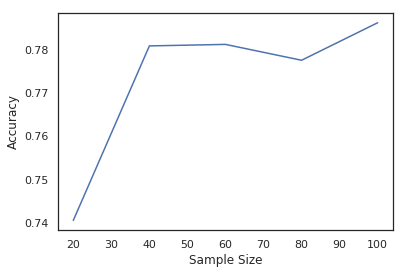

In [32]:
import re
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'].map(lambda x: re.sub(r'\W+', '', x))
Accuracy_df['Sample Size']  = Accuracy_df['Sample Size'].astype(int)
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'] / 10 

#Accuracy_df.sort_values(by= ['Sample Size'], inplace = True)
#Accuracy_df = Accuracy_df.reset_index()

g =sns.lineplot(x=Accuracy_df["Sample Size"].sort_values(), y="Accuracy",
                 
                sizes=(.25, 2.5), data=Accuracy_df)
g
Accuracy_df

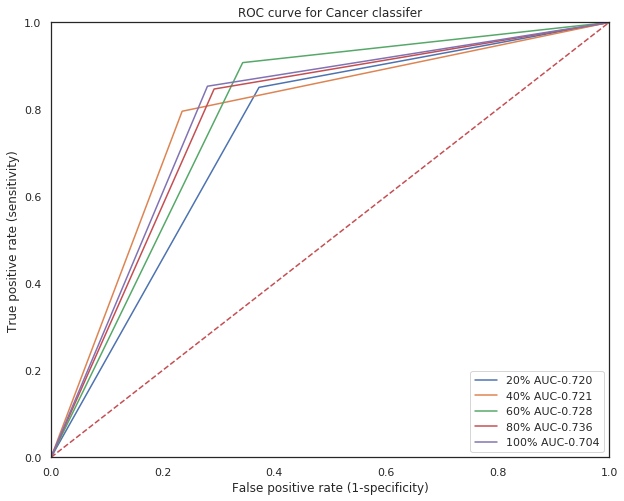

In [33]:
ROC_values.columns = ['fpr','tpr','Sample']
plt.figure(figsize=(10,8))
plt.plot(ROC_values['fpr'][0:3],ROC_values['tpr'][0:3],label='20% AUC-0.720')

plt.plot(ROC_values['fpr'][3:6],ROC_values['tpr'][3:6],label='40% AUC-0.721')
plt.plot(ROC_values['fpr'][6:9],ROC_values['tpr'][6:9],label='60% AUC-0.728')
plt.plot(ROC_values['fpr'][9:12],ROC_values['tpr'][9:12],label='80% AUC-0.736')
plt.plot(ROC_values['fpr'][12:15],ROC_values['tpr'][12:15],label='100% AUC-0.704')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)